In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Define Sampling Distributions
1. Mean of Gaussians (mu)
2. Variance of Gaussians (var)
3. Degrees of Freedom (df) - Only for T-distribution Sampling
4. Number of Bootstrapped Samples (n)

In [104]:
mu = [-1,-0,0,8]
sd = [1,2,8,10]

n = [10,10,10,10]

dist_seq=['gauss','gauss','gauss','gauss']

weights=[1,2,3,4]
samples = 10000

#### Sampling Distribution Functions

In [116]:
def sample_norm(mu,S,samples):
    return np.random.normal(loc=mu, scale = S, size=samples)

def sample_student(mu,S,df,samples):
    out=np.random.standard_t(df=df,size=samples)*S+mu
    return out  

def sample_standnorm(mu,samples):
    return np.random.standard_normal(samples)+mu
    

#### Define Parameter

In [106]:
def summation(series):
    return np.sum(series)

def product(series):
    out = 1
    for i in series:
        out *=i     
    return out

def weighted_sum(series,weights):
    out = 0
    for i in range(len(series)):
        out += series[i]*weights[i]
    return out

#### Create Samples

In [107]:
dist_names=[]
for i in range(len(mu)):
    dist_names.append("dist"+str(i))

np.random.seed(seed=1234)

#Modify to 
samples = pd.DataFrame(sample_norm(mu[0],sd[0],samples))
for i in range(len(mu)):
    samples[i] = pd.Series(sample_norm(mu[i],sd[i],samples))
    
samples.columns = dist_names

#### Create Estimates of Parameter

In [108]:
#samples['par']=samples.apply(summation,axis=0) 
#samples['par']=samples.apply(product,axis=0) 

samples['par']=np.zeros(samples.shape[0])
for i in range(samples.shape[0]):
    samples.loc[i,'par']=weighted_sum(samples.iloc[i,0:samples.shape[1]-1],weights=weights)

#### Plot All Distributions

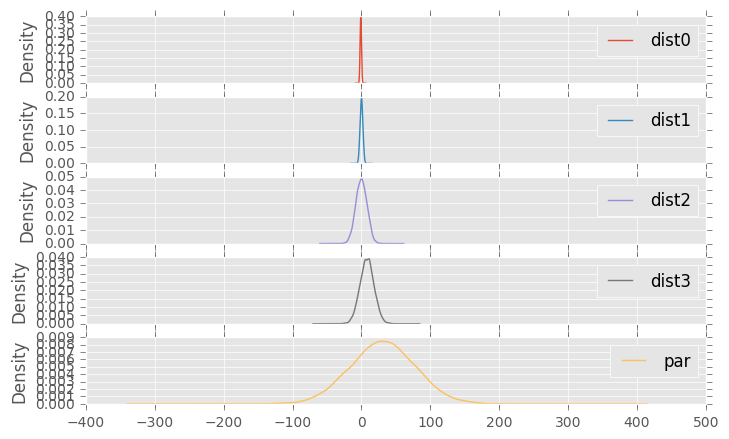

In [109]:
plt.style.use('ggplot')
samples.plot(kind='kde',subplots=True,figsize=(8,5))
plt.show()

In [120]:
samples['par'].describe()

count    10000.000000
mean        30.949341
std         47.317502
min       -151.871115
25%         -0.601040
50%         30.717127
75%         62.662667
max        225.366490
Name: par, dtype: float64